In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[: -5000], y_train_full[: -5000]
X_valid, y_valid = X_train_full[-5000: ], y_train_full[-5000: ]

In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
X_train.dtype

dtype('uint8')

In [5]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

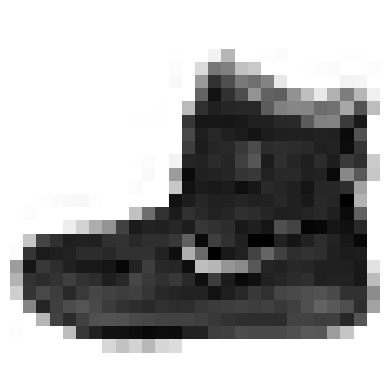

In [6]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

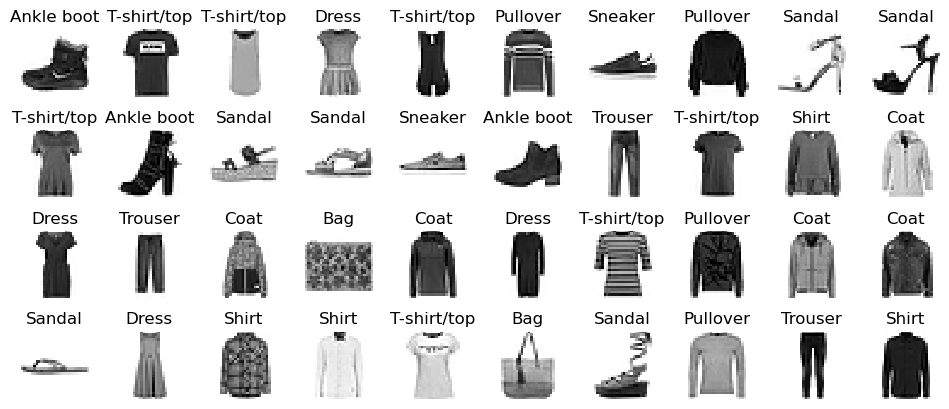

In [8]:
n_rows = 4
n_cols = 10
index = 0
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
        index += 1
plt.subplots_adjust(wspace=0.2, hspace=0.5)
        
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
hidden_layer_names = [model.layers[i].name for i in range(len(model.layers))]
hidden_layer_names

['flatten', 'dense', 'dense_1', 'dense_2']

In [14]:
weights, biases = hidden1.get_weights()

In [15]:
weights.shape

(784, 300)

In [16]:
biases.shape

(300,)

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6904 - accuracy: 0.7751 - val_loss: 0.4864 - val_accuracy: 0.8318
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4753 - accuracy: 0.8349 - val_loss: 0.4316 - val_accuracy: 0.8468
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4346 - accuracy: 0.8479 - val_loss: 0.4109 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4084 - accuracy: 0.8574 - val_loss: 0.4032 - val_accuracy: 0.8598
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3896 - accuracy: 0.8629 - val_loss: 0.3834 - val_accuracy: 0.8644
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3727 - accuracy: 0.8680 - val_loss: 0.3851 - val_accuracy: 0.8618
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3607 - accuracy: 0.8727 - val_loss: 0.3752 - val_accuracy:

In [19]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [20]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [21]:
history.history

{'loss': [0.69035804271698,
  0.47525057196617126,
  0.4346027672290802,
  0.40842318534851074,
  0.3895586431026459,
  0.3726826608181,
  0.36068981885910034,
  0.3492932915687561,
  0.33935546875,
  0.3308766186237335,
  0.3216448724269867,
  0.3138067424297333,
  0.30760639905929565,
  0.2994163930416107,
  0.293396919965744,
  0.2873717248439789,
  0.28168800473213196,
  0.27626603841781616,
  0.27080076932907104,
  0.26613643765449524,
  0.26228153705596924,
  0.25652986764907837,
  0.25293558835983276,
  0.24860866367816925,
  0.24312947690486908,
  0.24004048109054565,
  0.2359258383512497,
  0.23218218982219696,
  0.228560671210289,
  0.22536183893680573],
 'accuracy': [0.7751091122627258,
  0.8348545432090759,
  0.8479090929031372,
  0.8574000000953674,
  0.862854540348053,
  0.8679817914962769,
  0.8727090954780579,
  0.8756909370422363,
  0.8790909051895142,
  0.8826727271080017,
  0.8850908875465393,
  0.8874363899230957,
  0.8895999789237976,
  0.8920363783836365,
  0.8940

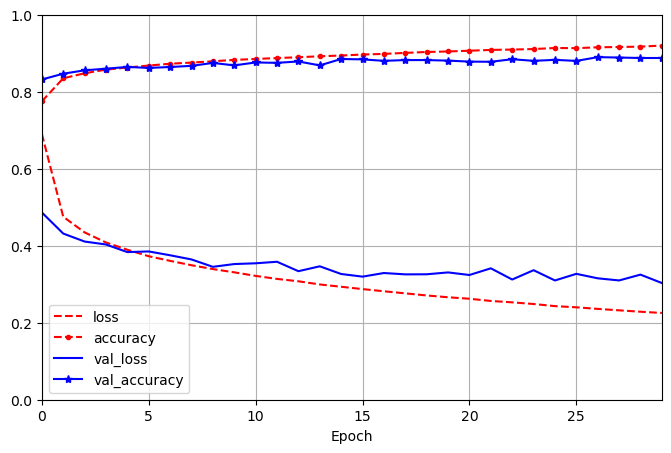

In [22]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel='Epoch',
    style=['r--', 'r--.', 'b-', 'b-*'])
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8851


[0.32858675718307495, 0.8851000070571899]

In [24]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 69ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = y_prob.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [28]:
np.array(class_names)

array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

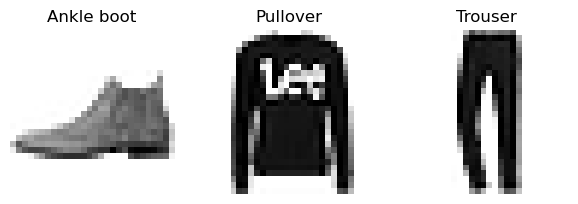

In [29]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_new[index]])
    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()